# Acurracy and runtime analyse of NOTEARS non-linear implementation using tensorflow.

To analyse the method, we'll test varying the number of variables in $[2, 5, 10, 15, 25, 50]$ and varying the number of samples in $[100, 1000, 10000]$.

In [13]:
import sys
sys.path.append('../src/')
from linear import notears_linear
from nonlinear import notears_nonlinear
from utils import simulate_dag, simulate_nonlinear_sem, simulate_linear_sem, count_accuracy

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [37]:
execution_times = pd.DataFrame(columns = [2, 5, 10, 15, 25, 50], index = [100, 1000, 10000])
shd_vals = pd.DataFrame(columns = [2, 5, 10, 15, 25, 50], index = [100, 1000, 10000])
fdr_vals = pd.DataFrame(columns = [2, 5, 10, 15, 25, 50], index = [100, 1000, 10000])
for n_variables in [2, 5, 10, 15, 25, 50]:
    for n_samples in [100, 1000, 10000]:
        G = simulate_dag(n_variables, 2*n_variables - int(n_variables/8))
        data = simulate_nonlinear_sem(G, n_variables).astype(np.float32)
        start_time = time.time()
        W = notears_nonlinear([n_variables, int(n_variables*1.5), 1], data, lambda1 = 0.01, lambda2 = 0.01)
        end_time = time.time()
        execution_times.loc[n_samples, n_variables] = end_time - start_time
        fdr, _, _, shd, _ = count_accuracy(nx.from_numpy_matrix(G, create_using = nx.DiGraph), 
                                           nx.from_numpy_matrix(W, create_using = nx.DiGraph))
        shd_vals.loc[n_samples, n_variables] = shd
        fdr_vals.loc[n_samples, n_variables] = fdr
        
    print("Finished iteration for %d vars"%(n_variables))

Finished iteration for 2 vars
Finished iteration for 5 vars
Finished iteration for 10 vars
Finished iteration for 15 vars
Finished iteration for 25 vars
Finished iteration for 50 vars


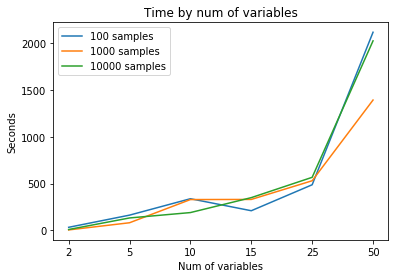

In [39]:
lv = execution_times.columns
lc = list(range(len(lv)))
plt.plot(lc, execution_times.iloc[0,:], label = "100 samples")
plt.plot(lc, execution_times.iloc[1,:], label = "1000 samples")
plt.plot(lc, execution_times.iloc[2,:], label = "10000 samples")
plt.xticks(ticks = lc, labels = lv)
plt.ylabel("Seconds")
plt.xlabel("Num of variables")
plt.title("Time by num of variables")
plt.legend()
plt.show()

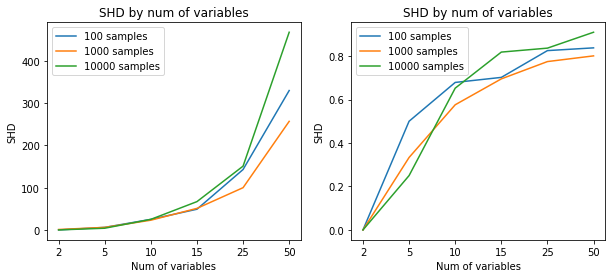

In [40]:
fig, axis = plt.subplots(1, 2)
ls = [str(x) for x in lv]
fig.set_figwidth(10)
fig.set_figheight(4)
axis[0].plot(ls, shd_vals.iloc[0,:], label = "100 samples")
axis[0].plot(ls, shd_vals.iloc[1,:], label = "1000 samples")
axis[0].plot(ls, shd_vals.iloc[2,:], label = "10000 samples")
axis[0].set_ylabel("SHD")
axis[0].set_xlabel("Num of variables")
axis[0].set_title("SHD by num of variables")
axis[0].legend()

axis[1].plot(ls, fdr_vals.iloc[0,:], label = "100 samples")
axis[1].plot(ls, fdr_vals.iloc[1,:], label = "1000 samples")
axis[1].plot(ls, fdr_vals.iloc[2,:], label = "10000 samples")
axis[1].set_ylabel("SHD")
axis[1].set_xlabel("Num of variables")
axis[1].set_title("SHD by num of variables")
axis[1].legend()
plt.show()